In [128]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [129]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [130]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [131]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [132]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [133]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [134]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [135]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(engine)

# Exploratory Precipitation Analysis

In [136]:
# Find the most recent date in the data set.
query = session.query(func.max(measurement.date))
latest_measurement = query.first()
latest_measurement

('2017-08-23',)

In [9]:
query = session.query(func.max(measurement.date))
latest_measurement = query.first()
latest_measurement
# session.query('measurment', 'station').order_by().first()


('2017-08-23',)

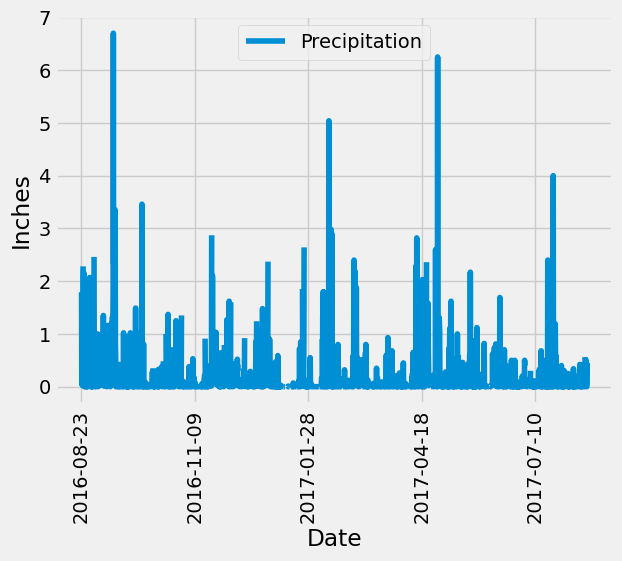

In [137]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# latest_date = (func.max(measurement.date))

latest_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
one_year_ago = latest_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

pandas_df = pd.DataFrame(query)
pandas_df.columns = ["Date", "Precipitation"]



# Sort the dataframe by date
pandas_df = pandas_df.sort_values(by=["Date"])


# Use Pandas Plotting with Matplotlib to plot the data
pandas_df.plot.line(x= 'Date', y= 'Precipitation', rot = 90)
plt.ylabel('Inches')
plt.show()


In [138]:
# Use Pandas to calculate the summary statistics for the precipitation data
pandas_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [139]:
# Design a query to calculate the total number of stations in the dataset
numStations = session.query(func.count(station.station)).all()
numStations

[(9,)]

In [140]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activeStation = session.query(station.station, func.count(measurement.id)).\
    join(measurement, station.station == measurement.station).\
    group_by(station.station).\
    order_by(func.count(measurement.id).desc())

result = query.all()
result

AttributeError: 'list' object has no attribute 'all'

In [141]:
query = session.query(station.station, func.count(measurement.id)).\
    join(measurement, station.station == measurement.station).\
    group_by(station.station).\
    order_by(func.count(measurement.id).desc())

result = query.all()
result

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [142]:
# numberStations = session.query(func.count('station')).all()
session.query(func.count(station.station)).all()
# stations = query.count()
# stations

# SELECT COUNT(StationID) AS CountOfStations
# FROM Stations;

[(9,)]

In [143]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_query = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281')

# Print the result as a list of tuples
temp_result = temp_query.all()
temp_result

[(54.0, 85.0, 71.66378066378067)]

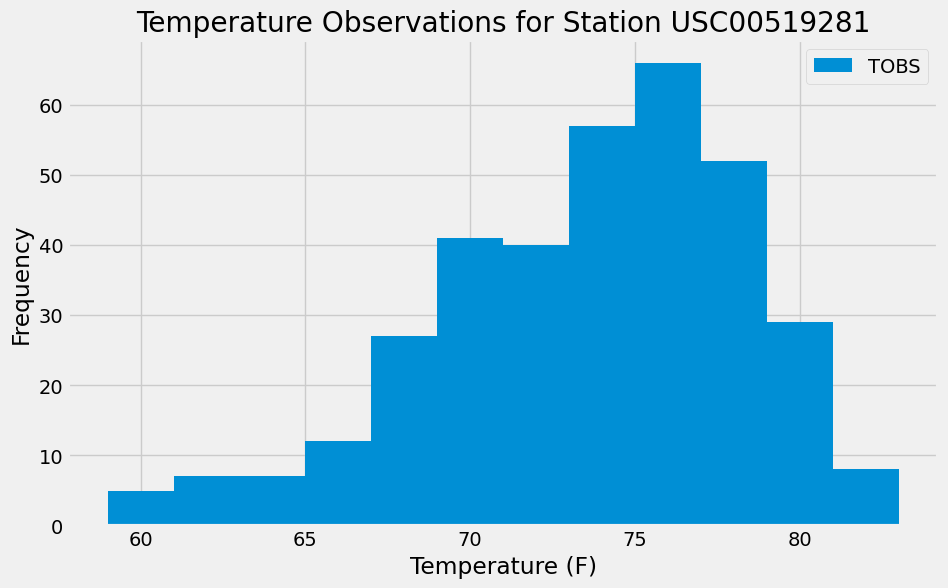

In [144]:
# Get the most active station id from the first row of the query result
most_active_station = query.first()[0]

# Query the measurement table and filter by the most active station id
# Get the date and temperature observation data for the last 12 months
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
last_year = dt.datetime.strptime(last_date, "%Y-%m-%d") - dt.timedelta(days=365)
temp_query = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == most_active_station).\
    filter(measurement.date >= last_year)

# Convert the query result to a pandas DataFrame and set the index to date column
temp_df = pd.read_sql(temp_query.statement, temp_query.session.bind)
temp_df.set_index("date", inplace=True)

# Plot the DataFrame as a histogram with 12 bins and a title and labels
temp_df.plot(kind="hist", bins=12, figsize=(10, 6))
plt.title(f"Temperature Observations for Station {most_active_station}")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.legend(["TOBS"])
plt.show()

# Close Session

In [127]:
# Close Session
session.close()

In [145]:
session = Session(engine)

#    """""Return Stations"""""
Station = Base.classes.station
results = session.query(Station.station).all()


#    """""Convert the query result to a dictionary using date as the key and prcp as the value"""""
stations = list(np.ravel(results))
stations

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']